#IMPORTING LIBRARIES

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#GOOGLE AUTHENTICATION

In [62]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTING DATASET

In [66]:
path='/content/drive/MyDrive/car_data.csv'

In [67]:
data= pd.read_csv(path)

In [68]:
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [69]:
#!pip install pandas_profiling

In [70]:
from pandas_profiling import ProfileReport
#EDA using Pandas Profiling
file = ProfileReport(data)
file.to_file(output_file='output.html')

ModuleNotFoundError: ignored

#EDA : Exploratory Data Analysis

In [71]:
data.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [72]:
data.tail(10)

,User ID,Gender,Age,AnnualSalary,Purchased
990,971,Male,25,56500,0
991,382,Female,30,48500,0
992,168,Female,24,67500,0
993,476,Female,54,136500,0
994,951,Female,53,104000,1
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [73]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [74]:
data.shape

(1000, 5)

In [75]:
data["Purchased"].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

We can see that in the entire dataset 598 entries are where car has not been purchased and 402 entries are where car has been purchased

In [76]:
data.isnull().values.any()

False

In [77]:
data.duplicated().sum()

0

In [78]:
data.drop(['User ID'],axis=1,inplace=True)

#VISUALIZATION

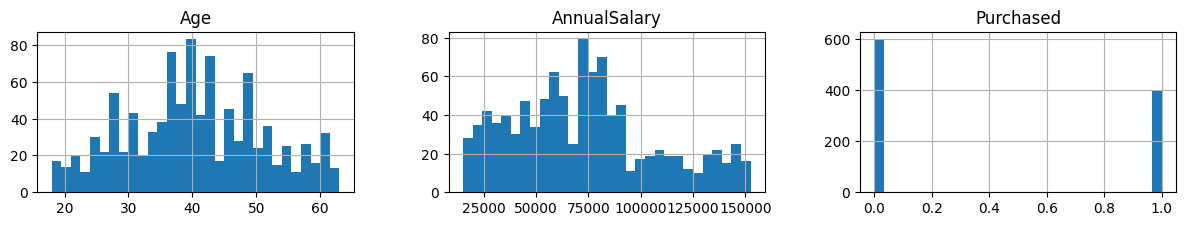

In [79]:
data.hist(bins=30, 
        figsize=(20,40),
        layout=(15,4));

In [80]:
data.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


#VISULIZATION

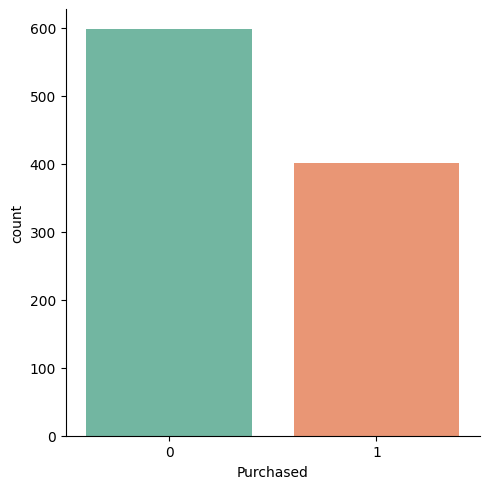

In [81]:
# The visualisation of purchased
sns.catplot(x="Purchased", kind="count", data=data, palette="Set2")
plt.show()

<Axes: xlabel='Purchased', ylabel='count'>

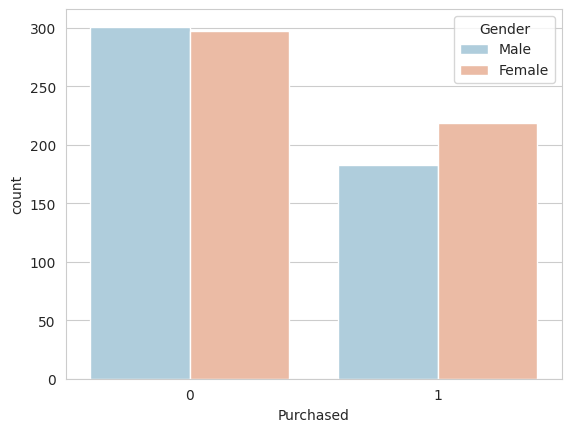

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',hue='Gender',data=data,palette='RdBu_r')

In [83]:
data.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


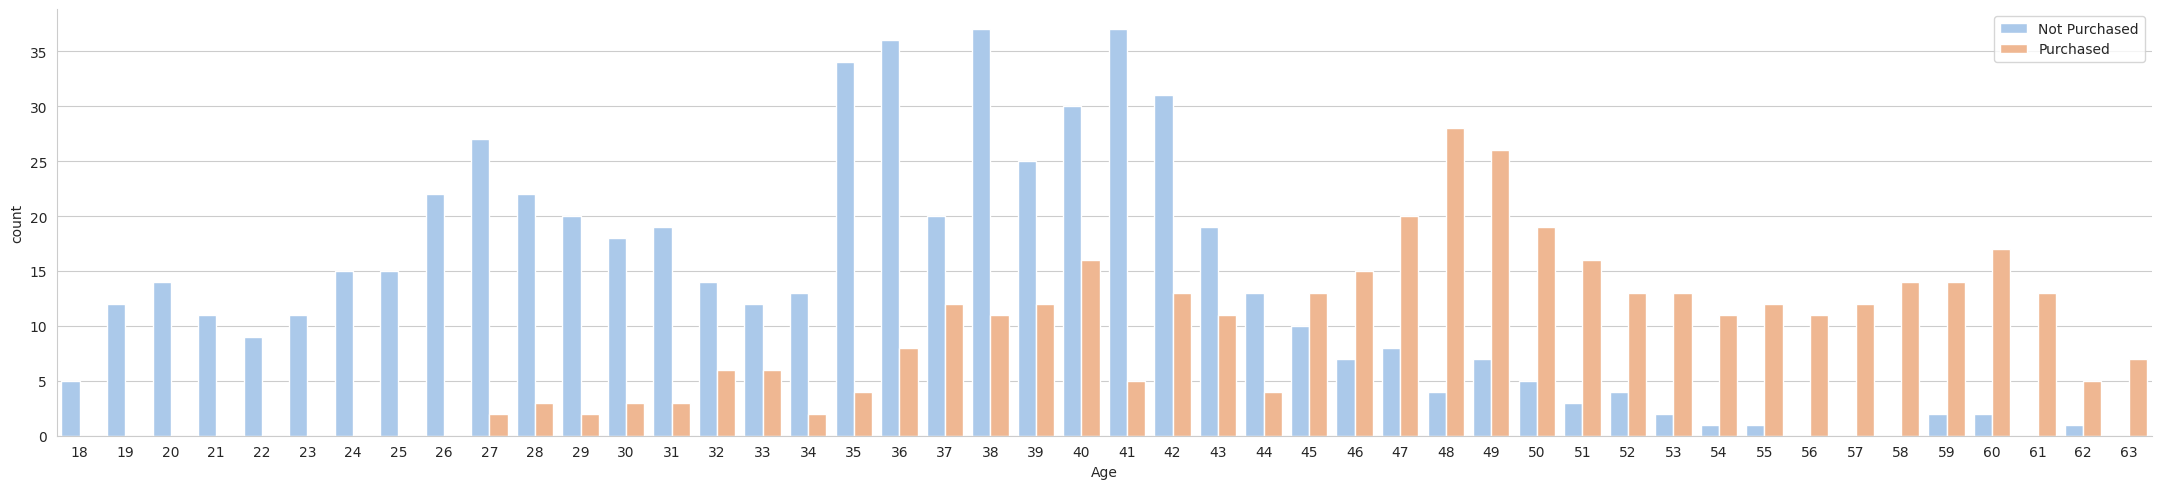

In [84]:
# The visualisation count of Age of their diabetics
ax = sns.catplot(x="Age", kind="count",hue="Purchased",data=data, palette="pastel", legend=False)
ax.fig.set_figwidth(25)
plt.legend(loc='upper right', labels= ["Not Purchased", "Purchased"])
plt.show()

In [85]:
# Age Distribution
import plotly.express as px
fig = px.histogram(data, x="Age",
                   marginal="box")
fig.show()

In [86]:
# Age distribution by Outcome 0
fig = px.histogram(data, x=data[data.Purchased==0].Age,
                   marginal="box",
                   color_discrete_sequence=['lightgreen'])
fig.show()

In [87]:
# Age distribution by Outcome 0
fig = px.histogram(data, x=data[data.Purchased==1].Age,
                   marginal="box",
                   color_discrete_sequence=['orange'])
fig.show()

<ipython-input-88-6c71ac866e2e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

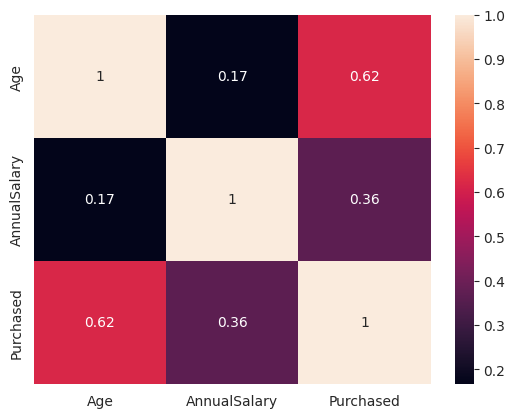

In [88]:
sns.heatmap(data.corr(),annot=True)

In [89]:
data.head(10)

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
5,Female,47,33500,1
6,Female,46,132500,1
7,Male,42,64000,0
8,Female,30,84500,0
9,Male,41,52000,0


In [90]:
data.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [91]:
X_num = data[['Age', 'AnnualSalary']]
X_cat = data[['Gender']]

In [92]:
X_cat

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
995,Male
996,Female
997,Female
998,Female


In [93]:
#One Hot Encodding -- Changing categorical data into seperate integer column
X_cat = pd.get_dummies(X_cat)

In [94]:
X_cat

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
995,0,1
996,1,0
997,1,0
998,1,0


In [95]:
#Normalizing the data 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)




In [96]:
X_scaled

array([[0.37777778, 0.03636364],
       [0.48888889, 0.20727273],
       [0.68888889, 0.42909091],
       ...,
       [0.22222222, 0.89818182],
       [0.66666667, 0.86545455],
       [0.57777778, 0.42545455]])

In [97]:
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)


In [98]:
X_scaled

,Age,AnnualSalary
0,0.377778,0.036364
1,0.488889,0.207273
2,0.688889,0.429091
3,0.488889,0.672727
4,0.155556,0.465455
...,...,...
995,0.444444,0.320000
996,0.644444,0.061818
997,0.222222,0.898182
998,0.666667,0.865455


In [99]:
X = pd.concat([X_scaled, X_cat], axis=1)
Y = data['Purchased']

In [100]:
X.head(10)

,Age,AnnualSalary,Gender_Female,Gender_Male
0,0.377778,0.036364,0,1
1,0.488889,0.207273,0,1
2,0.688889,0.429091,0,1
3,0.488889,0.672727,0,1
4,0.155556,0.465455,0,1
5,0.644444,0.134545,1,0
6,0.622222,0.854545,1,0
7,0.533333,0.356364,0,1
8,0.266667,0.505455,1,0
9,0.511111,0.269091,0,1


#TRAIN AND TEST SPLIT(70:30)

In [101]:
data.shape

(1000, 4)

In [102]:
from sklearn.model_selection import train_test_split
# Features means X columns and label means target column

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print("features: ", X_train.shape)
print("labels: ", Y_train.shape)
print("test_features: ", X_test.shape)
print("test_labels: ", Y_test.shape)

features:  (700, 4)
labels:  (700,)
test_features:  (300, 4)
test_labels:  (300,)


#Logisting Regression Classifier using sklearn library

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score

#Training the model

In [104]:
lr = LogisticRegression(solver='liblinear', max_iter = 1000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

#Predicting the accuracy of data

In [105]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

#Train Accuracy

In [106]:
prediction_train = lr.predict(X_train)
print("Logistic Regression train accuracy:", accuracy(Y_train, prediction_train))

Logistic Regression train accuracy: 0.8171428571428572


In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, prediction_train)

array([[386,  40],
       [ 88, 186]])

In [108]:
#train score
score = accuracy_score(Y_train, prediction_train)
score

0.8171428571428572

#Test data evaluation

In [109]:
Y_test

521    0
737    1
740    0
660    1
411    0
      ..
468    1
935    0
428    0
7      0
155    1
Name: Purchased, Length: 300, dtype: int64

In [110]:
type(lr)

sklearn.linear_model._logistic.LogisticRegression

In [111]:
X_test

,Age,AnnualSalary,Gender_Female,Gender_Male
521,0.511111,0.425455,0,1
737,0.911111,0.876364,0,1
740,0.155556,0.323636,0,1
660,0.644444,0.200000,1,0
411,0.622222,0.876364,1,0
...,...,...,...,...
468,0.911111,0.665455,1,0
935,0.377778,0.363636,1,0
428,0.533333,0.229091,0,1
7,0.533333,0.356364,0,1


In [112]:
print(X_test.iloc[0:5])
print(Y_test.iloc[0:5])

          Age  AnnualSalary  Gender_Female  Gender_Male
521  0.511111      0.425455              0            1
737  0.911111      0.876364              0            1
740  0.155556      0.323636              0            1
660  0.644444      0.200000              1            0
411  0.622222      0.876364              1            0
521    0
737    1
740    0
660    1
411    0
Name: Purchased, dtype: int64


In [113]:
p = lr.predict(X_test.iloc[0:5])
p

array([0, 1, 0, 0, 1])

In [114]:
prediction_test = lr.predict(X_test)
print("Logistic Regression test accuracy:", accuracy(Y_test, prediction_test))

Logistic Regression test accuracy: 0.8166666666666667


In [115]:
#prediction_test

In [116]:
score = accuracy_score(Y_test, prediction_test)
score

0.8166666666666667

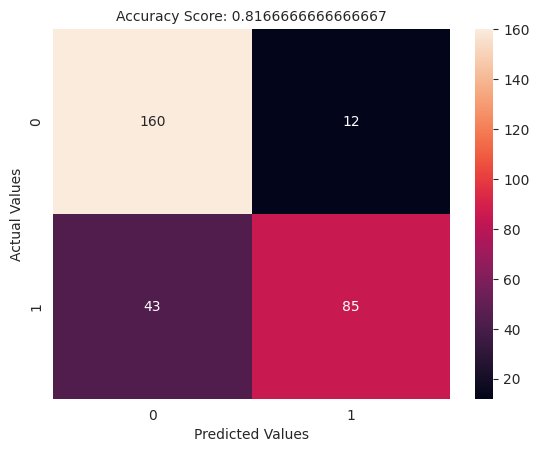

In [117]:
cm1 = confusion_matrix(Y_test, prediction_test)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 10)
plt.show()

In [118]:
print(classification_report(Y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       172
           1       0.88      0.66      0.76       128

    accuracy                           0.82       300
   macro avg       0.83      0.80      0.80       300
weighted avg       0.83      0.82      0.81       300



#ROC CURVE

In [119]:
from sklearn.metrics import roc_curve

In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(Y_test, prediction_test) #prediction_test,Y_test
roc_auc = auc(fpr, tpr)



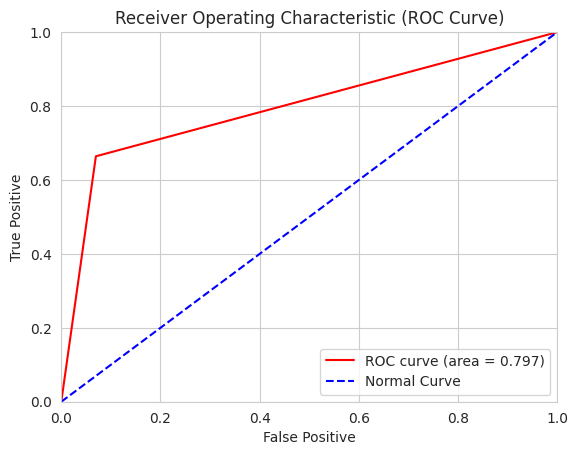

In [121]:
# Plot ROC curve
plt.plot(fpr, tpr,color='red', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='blue',linestyle='--',label= 'Normal Curve')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")

# Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
#creating object and providing training data 
dtree=DecisionTreeClassifier() 
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [123]:
#Predicting frim our model 
pre=dtree.predict(X_test)

In [128]:
pre

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

#TRAIN ACCURACY

In [152]:
#Train Accuracy
prediction_train_dtree = dtree.predict(X_train)
print("DTree Regression train accuracy:", accuracy(Y_train, prediction_train_dtree))

DTree Regression train accuracy: 0.9942857142857143


In [136]:
#displaying the classification report and confusion matrix 
print(confusion_matrix(Y_train,prediction_train_dtree)) 
print(classification_report(Y_train,prediction_train_dtree))

[[426   0]
 [  4 270]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       426
           1       1.00      0.99      0.99       274

    accuracy                           0.99       700
   macro avg       1.00      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



In [133]:
#train score
score_dtree = accuracy_score(Y_train, prediction_train_dtree)
score_dtree

0.9942857142857143

In [134]:
#Test Accuracy
prediction_test_dtree = dtree.predict(X_test)
print("DTree Regression test accuracy:", accuracy(Y_test, prediction_test_dtree))

DTree Regression test accuracy: 0.9033333333333333


In [138]:
#test score
score_dtree = accuracy_score(Y_test, prediction_test_dtree)
score_dtree


0.9033333333333333

In [139]:
#displaying the classification report and confusion matrix 
print(confusion_matrix(Y_test,prediction_test_dtree)) 
print(classification_report(Y_test,prediction_test_dtree))

[[164   8]
 [ 21 107]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       172
           1       0.93      0.84      0.88       128

    accuracy                           0.90       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.90      0.90       300



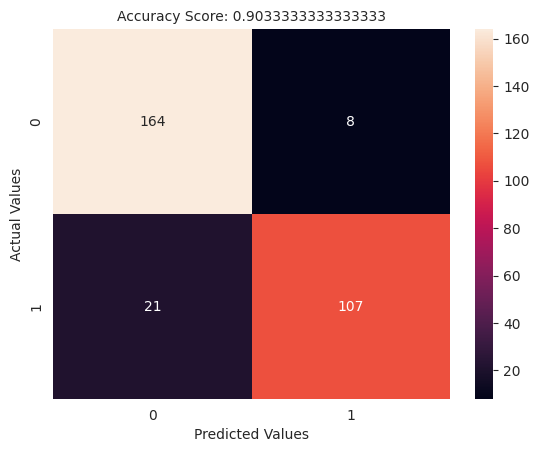

In [149]:
cm2 = confusion_matrix(Y_test, prediction_test_dtree)
sns.heatmap(cm2, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_dtree), size = 10)
plt.show()

In [141]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(Y_test, prediction_test_dtree) #prediction_test_dtree,Y_test
roc_auc = auc(fpr, tpr)



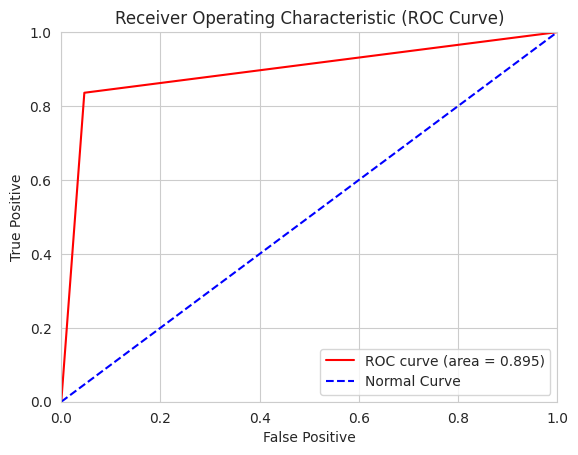

In [142]:
# Plot ROC curve
plt.plot(fpr, tpr,color='red', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='blue',linestyle='--',label= 'Normal Curve')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")

#RANDOM FOREST CLASSIFIER

In [143]:
from sklearn.ensemble import RandomForestClassifier
#creating an object for random forest having 1000 as parameter for n_estimators 
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

In [144]:
#prediction using this model 
rfc_pred=rfc.predict(X_test)
#displaying the confusion matrix and classification report 
print(confusion_matrix(Y_test,rfc_pred)) 
print(classification_report(Y_test,rfc_pred))

[[161  11]
 [ 23 105]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.90       172
           1       0.91      0.82      0.86       128

    accuracy                           0.89       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.89      0.89       300



In [148]:
#rfc_pred

#TRAIN ACCURACY RANDOM FOREST

In [147]:
prediction_train_rforest = rfc.predict(X_train)
print("RForest Regression train accuracy:", accuracy(Y_train, prediction_train_rforest))

RForest Regression train accuracy: 0.9942857142857143


In [150]:
#displaying the classification report and confusion matrix 
print(confusion_matrix(Y_train,prediction_train_rforest)) 
print(classification_report(Y_train,prediction_train_rforest))

[[423   3]
 [  1 273]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       426
           1       0.99      1.00      0.99       274

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



In [151]:
#train score
score_rforest = accuracy_score(Y_train, prediction_train_rforest)
score_rforest

0.9942857142857143

In [156]:
prediction_test_rforest = rfc.predict(X_test)


In [157]:
#displaying the classification report and confusion matrix 
print(confusion_matrix(Y_test,prediction_test_rforest)) 
print(classification_report(Y_test,prediction_test_rforest))

[[161  11]
 [ 23 105]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.90       172
           1       0.91      0.82      0.86       128

    accuracy                           0.89       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.89      0.89       300



In [158]:
#test score
score_rforest = accuracy_score(Y_test, prediction_test_rforest)
score_rforest

0.8866666666666667

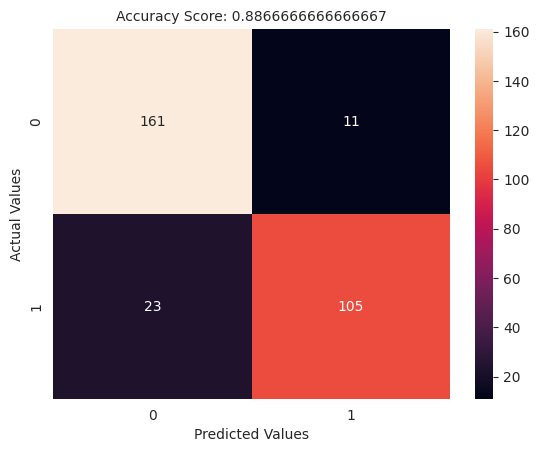

In [160]:
cm3 = confusion_matrix(Y_test, prediction_test_rforest)
sns.heatmap(cm3, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score_rforest), size = 10)
plt.show()

In [161]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(Y_test, prediction_test_rforest) #prediction_test_dtree,Y_test
roc_auc = auc(fpr, tpr)



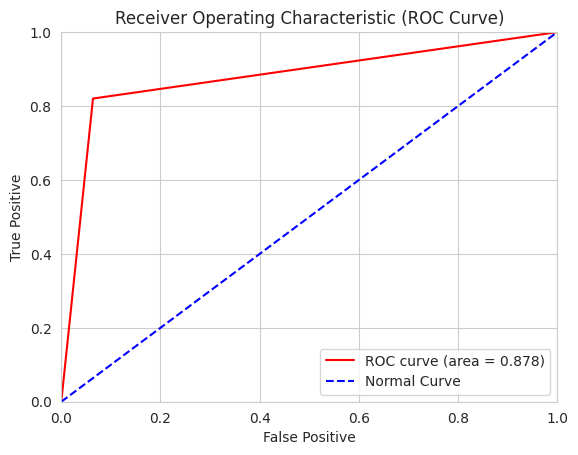

In [162]:
# Plot ROC curve
plt.plot(fpr, tpr,color='red', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='blue',linestyle='--',label= 'Normal Curve')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")

<b> We finally find that the 'Decision Tree' model has the best accuracy. Hence we choose it.